In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import os
import json
import pandas as pd
import IPython.display as display
from pathlib import Path
import numpy as np
from PIL import Image
from datetime import datetime
import tensorflow as tf

In [9]:
file_list_DF = pd.read_csv("database/file_list.csv")
check_num = 501
check_img_date = file_list_DF.iloc[check_num][0]
check_img_path = file_list_DF.iloc[check_num][1]

In [10]:
check_img_path

'2018-11-21 10:18:46'

In [11]:
file_list_DF = pd.DataFrame(file_list)

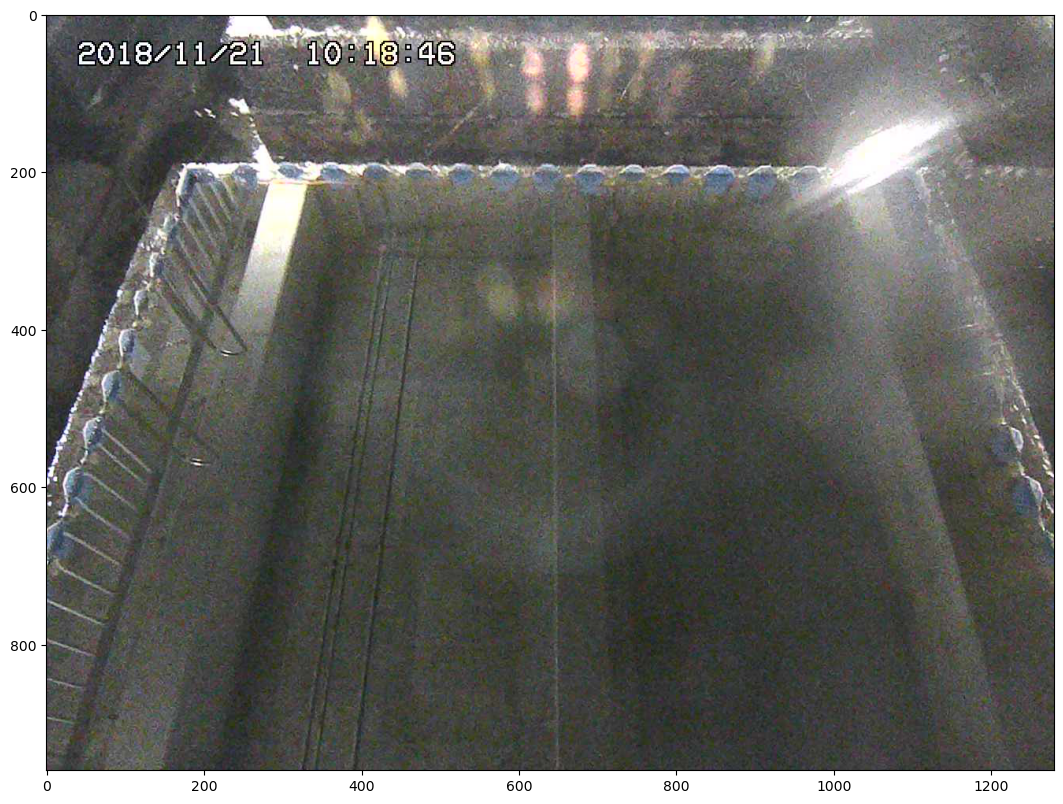

2018-11-21 10:18:46


In [12]:
# file_list_DF = pd.read_csv("database/file_list.csv")
check_num = 501
check_img_date = file_list_DF.iloc[check_num][0]
check_img_path = file_list_DF.iloc[check_num][1]
check_img = Image.open(check_img_path)
img = np.asarray(check_img)
plt.figure(figsize=(13, 10))
plt.imshow(img)
plt.show()
print(check_img_date)

In [13]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import os
import json
import pandas as pd
import IPython.display as display
from pathlib import Path
import numpy as np
from PIL import Image
from datetime import datetime
import cv2

In [14]:
file_list_DF = pd.read_csv("database/file_list.csv")

In [15]:
file_list_DF = pd.read_csv("database/file_list.csv", index_col=0)

In [17]:
with open("json/img_resize.json", "r") as f:
    img_resize = json.load(f)

In [18]:
y0 = img_resize.get("crop_lat_n")

In [19]:
img_resize

{'start_index    ': '    2018-11-1 00:00:00',
 'end_index      ': '   2018-11-30 23:59:59',
 'crop_lat_n     ': '                   400',
 'crop_lat_s     ': '                   900',
 'crop_lon_w     ': '                   400',
 'crop_lon_e     ': '                   900',
 'resize_height  ': '                   256',
 'resize_width   ': '                   256',
 'illum_low_lim  ': '                    85',
 'illum_high_lim ': '                   100'}

In [23]:
img_resize["crop_lat_n     "]

'                   400'

In [24]:
with open("json/img_resize.json", "r") as f:
    img_resize = json.load(f)

In [25]:
y1 = img_resize["crop_lat_n"]
y0 = img_resize["crop_lat_s"]
x0 = img_resize["crop_lon_w"]
x1 = img_resize["crop_lon_e"]

In [40]:
print(x0,x1,y0,y1)

400 900 400 900


In [41]:
crop_grid = [range(y0, y1), range(x0, x1)]

In [42]:
height = img_resize["resize_height"]
width = img_resize["resize_width"]

In [44]:
[range(y0, y1), range(x0, x1)]

[range(400, 900), range(400, 900)]

In [47]:
cropped_img = img[y0: y1, x0: x1]

In [48]:
cropped_img.shape

(500, 500, 3)

In [49]:
cropped_img = cv2.resize(cropped_img, (height, width))

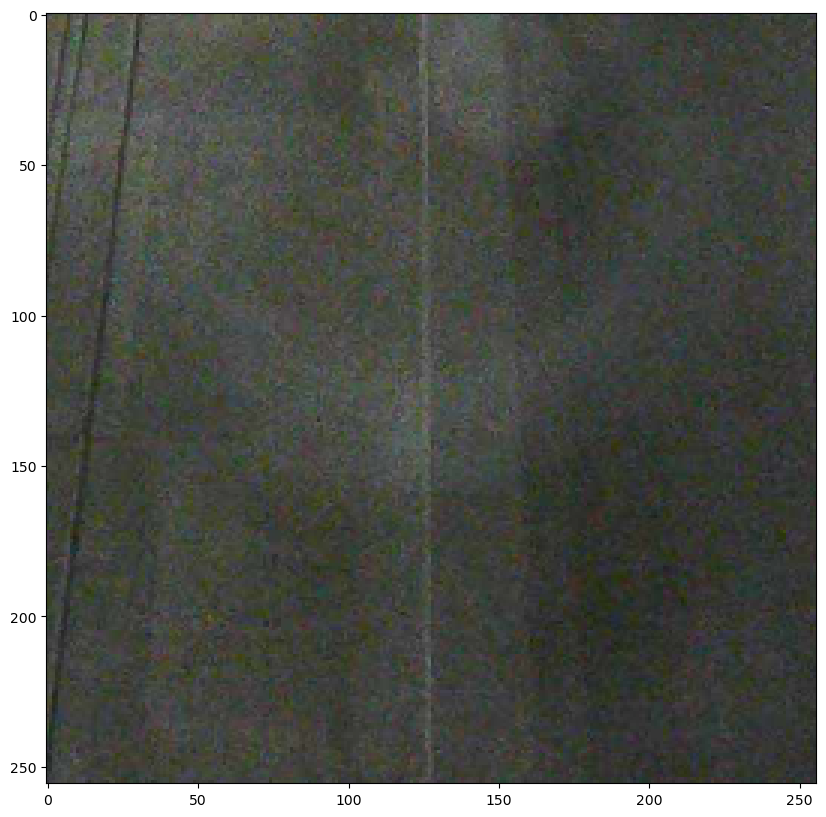

In [50]:
plt.figure(figsize=(10, 10))
plt.imshow(cropped_img)
plt.show()

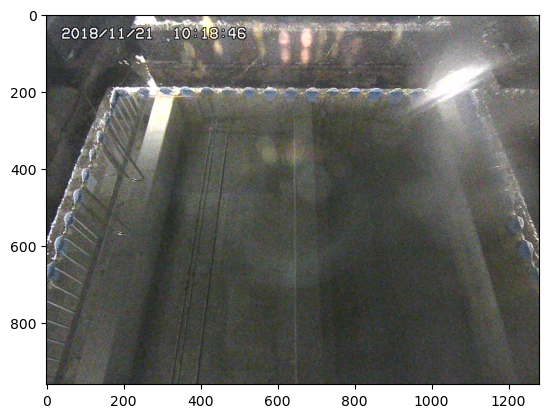

In [51]:
plt.imshow(img)
plt.show()

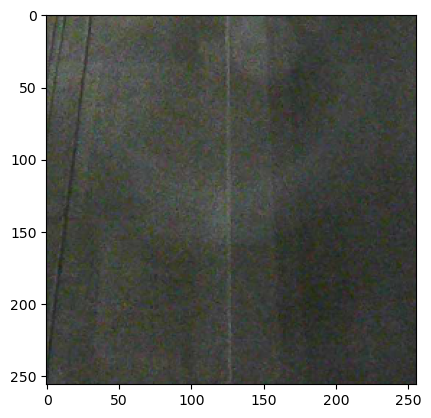

In [52]:
plt.imshow(cropped_img)
plt.show()

In [53]:
hsv_img = cv2.cvtColor(cropped_img, cv2.COLOR_RGB2HSV)
image_v = hsv_img[:, :, 2]
illum = image_v.mean()

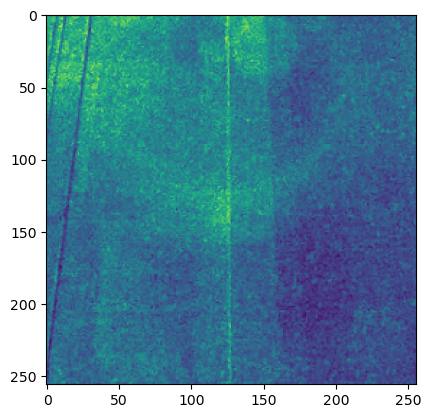

In [54]:
plt.imshow(image_v)
plt.show()

In [55]:
file_list_DF.shape

(1000, 2)

In [56]:
(img_num, _) = file_list_DF.shape

In [57]:
img_num

1000

In [60]:
file_list_DF.iloc[0]

datatime                                  2018-08-21 09:10:46
filename    \\10.101.65.115\広島西部\002_広島西部水資源再生センター\02_data...
Name: 0, dtype: object

In [61]:
file_list_DF.iloc[0][1]

'\\\\10.101.65.115\\広島西部\\002_広島西部水資源再生センター\\02_data\\05_静止画\\07_東3-2系終沈\\2018.12.17 回収\\00001057\\18082109.00\\img_.01\\10460001.jpg'

In [62]:
illum_list = []

In [63]:
img = cv2.imread(file_list_DF.iloc[i][1])

In [65]:
img = np.asarray(img)

In [67]:
img = Image.open(file_list_DF.iloc[i][1])
img = np.asarray(img)

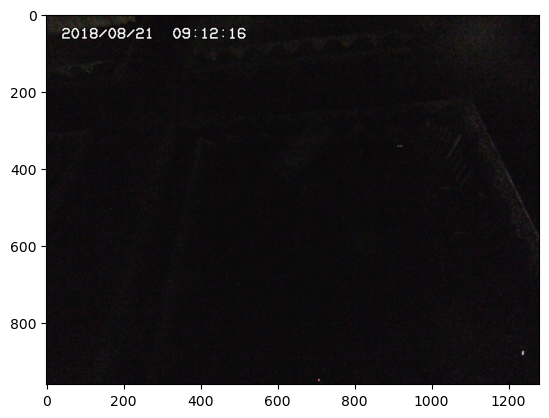

In [68]:
plt.imshow(img)
plt.show()

In [69]:
cropped_img = img[y0: y1, x0: x1]
cropped_img = cv2.resize(cropped_img, (height, width))

In [70]:
plt.imshow(cropped_img)

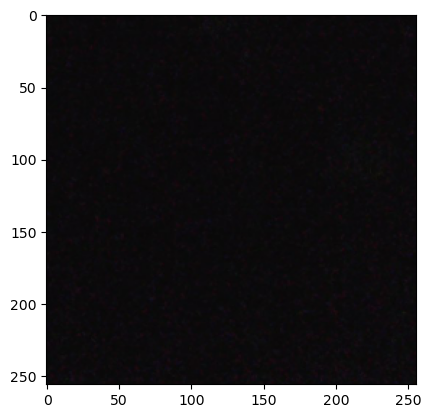

In [71]:
plt.show()

In [73]:
hsv_img = cv2.cvtColor(cropped_img, cv2.COLOR_RGB2HSV)
image_v = hsv_img[:, :, 2]
illum = image_v.mean()

In [74]:
illum

12.86053466796875

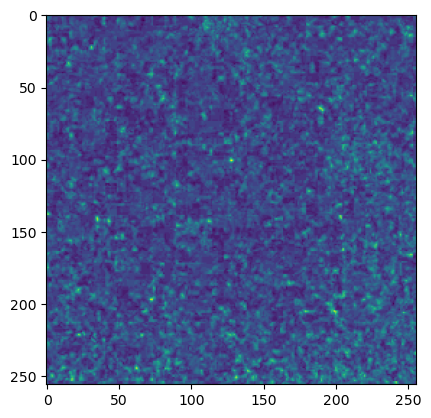

In [75]:
plt.imshow(image_v)
plt.show()

In [76]:
(img_num, _) = file_list_DF.shape
illum_list = []
for i in range(img_num):
    img = Image.open(file_list_DF.iloc[i][1])
    img = np.asarray(img)
    cropped_img = img[y0: y1, x0: x1]
    cropped_img = cv2.resize(cropped_img, (height, width))
    hsv_img = cv2.cvtColor(cropped_img, cv2.COLOR_RGB2HSV)
    image_v = hsv_img[:, :, 2]
    illum_list.append(image_v.mean())
illum = {"datatime": file_list_DF.iloc[i][0], "illum_mean": illum_list}

In [80]:
illum = {"datatime": file_list_DF["datatime"].values, "illum_mean": illum_list}

In [81]:
pd.DataFrame(illum).to_csv("database/illum_mean.csv")

In [82]:
illum_mean_list = pd.read_csv("database/illum_mean.csv")

In [83]:
import seaborn as sns

In [84]:
fig = plt.figure()
with plt.style.context('seaborn-poster') as st:
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlim(0, 255)
    sns.distplot(illum_mean_list["illum_mean"].values, label="illum", kde=False,
                 rug=False, bins=40, hist_kws={"alpha": 0.8}, ax=ax)
    ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left",
              borderaxespad=0., frameon=True, edgecolor="blue")

C:\Users\0000210032\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [87]:
plt.figure(figsize=(20, 10))
plt.show()

<Figure size 2000x1000 with 0 Axes>

C:\Users\0000210032\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


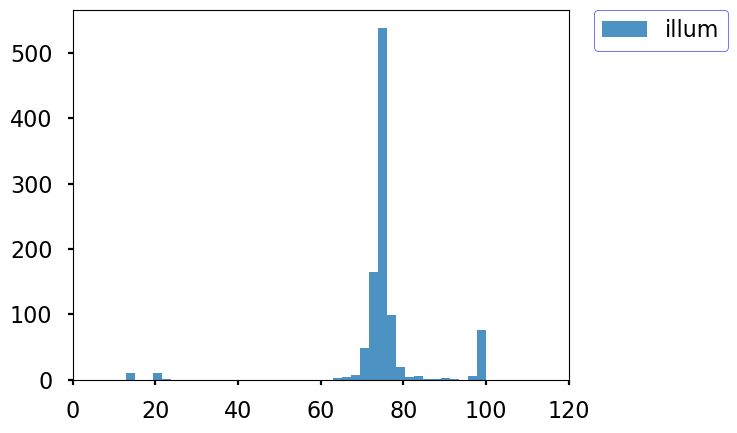

<Figure size 2000x1000 with 0 Axes>

In [89]:
fig = plt.figure()
plt.figure(figsize=(20, 10))
with plt.style.context('seaborn-poster') as st:
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlim(0, 120)
    sns.distplot(illum_mean_list["illum_mean"].values, label="illum", kde=False,
                 rug=False, bins=40, hist_kws={"alpha": 0.8}, ax=ax)
    ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left",
              borderaxespad=0., frameon=True, edgecolor="blue")

plt.show()

In [90]:
plt.bar(range(150), illum_mean_list["illum_mean"].values)
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [91]:
illum_mean_list["illum_mean"].values


array([14.04620361, 13.17999268, 12.98396301, 12.76846313, 12.88713074,
       13.13929749, 13.27134705, 13.31689453, 13.22657776, 12.86053467,
       20.97976685, 64.40426636, 65.23350525, 64.35301208, 78.2469635 ,
       79.47297668, 80.36228943, 65.84901428, 66.87339783, 64.59010315,
       78.6050415 , 76.24813843, 75.87825012, 75.99621582, 75.96238708,
       75.95927429, 75.84487915, 75.84757996, 75.7678833 , 75.55484009,
       79.72685242, 76.00097656, 75.94104004, 75.54890442, 75.23298645,
       75.01321411, 74.88526917, 74.73348999, 74.74786377, 74.46429443,
       67.56228638, 66.95806885, 68.52537537, 67.70834351, 69.30209351,
       69.37026978, 69.40000916, 69.9994812 , 70.3812561 , 71.16163635,
       74.28263855, 74.9079895 , 74.75563049, 74.7278595 , 74.59315491,
       74.69606018, 75.64906311, 74.77278137, 74.79093933, 74.963974  ,
       74.66142273, 75.16000366, 75.7093811 , 76.18121338, 76.1688385 ,
       75.74519348, 75.46127319, 76.21133423, 74.10102844, 75.50